In [117]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [118]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
test = pd.read_csv("test.csv")

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:xlabel='Survived', ylabel='count'>

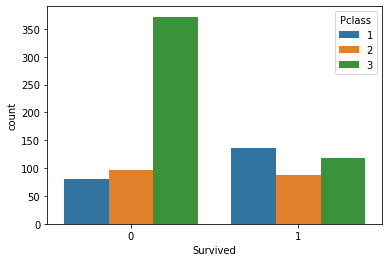

In [3]:
sns.countplot(x="Survived", data=train_data, hue="Pclass")

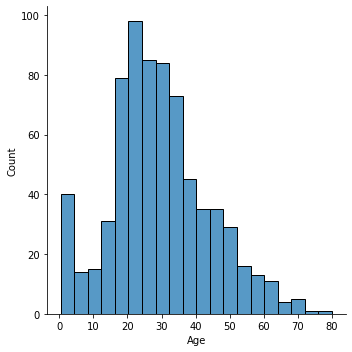

In [4]:
sns.displot(train_data["Age"])

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

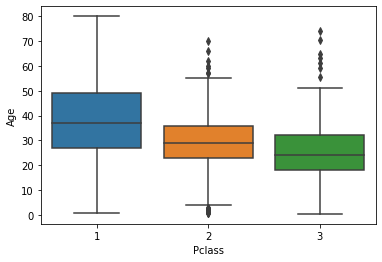

In [7]:
sns.boxplot(x="Pclass", y="Age", data=train_data)

In [8]:
print(train_data[train_data["Pclass"] == 1]["Age"].mean())
print(train_data[train_data["Pclass"] == 2]["Age"].mean())
print(train_data[train_data["Pclass"] == 3]["Age"].mean())

38.233440860215055
29.87763005780347
25.14061971830986


In [9]:
def fill_in_na_values(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return round(train_data[train_data["Pclass"] == 1]["Age"].mean())
        elif pclass == 2:
            return round(train_data[train_data["Pclass"] == 2]["Age"].mean())
        elif pclass == 3:
            return round(train_data[train_data["Pclass"] == 3]["Age"].mean())
    else:
        return age
    
train_data["Age"] = train_data[["Age", "Pclass"]].apply(fill_in_na_values, axis=1)
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

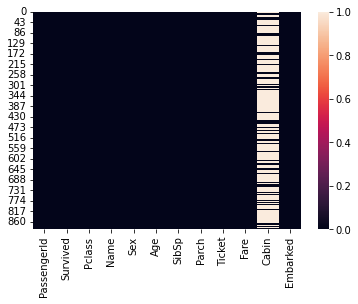

In [10]:
sns.heatmap(train_data.isnull())

In [11]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
train_data.drop(["Cabin"], axis=1, inplace=True)

In [13]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [14]:
train_data.dropna(inplace=True)

In [15]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [16]:
train_data.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace=True)

In [17]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [18]:
train_data["Sex"].unique()

array(['male', 'female'], dtype=object)

In [19]:
sex = pd.get_dummies(train_data["Sex"], drop_first=True)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [20]:
embarked = pd.get_dummies(train_data["Embarked"], drop_first=True)
embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [21]:
train_data.drop(["Sex", "Embarked"], axis=1, inplace=True)

In [22]:
train_data = pd.concat([train_data, sex, embarked], axis=1)
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [23]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X =  train_data.drop("Survived", axis=1)
y = train_data["Survived"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [24]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [25]:
X_train
X

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0,1
887,1,19.0,0,0,30.0000,0,0,1
888,3,25.0,1,2,23.4500,0,0,1
889,1,26.0,0,0,30.0000,1,0,0


In [26]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

predictions = svm.predict(X_val)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_val, predictions))
print(confusion_matrix(y_val, predictions))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87       115
           1       0.92      0.52      0.67        63

    accuracy                           0.81       178
   macro avg       0.85      0.75      0.77       178
weighted avg       0.83      0.81      0.80       178

[[112   3]
 [ 30  33]]


In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {"C":[0.1,1,10,50,100,1000], "gamma":[1,0.1,0.001,0.0001,0.00001,0.000001]}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)
grid_predictions = grid.predict(X_val)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END .................................C=0.1, gamma=0.001; total time=   0.0s
[CV] END .................................C=0.1

[CV] END .................................C=50, gamma=0.0001; total time=   0.0s
[CV] END .................................C=50, gamma=0.0001; total time=   0.0s
[CV] END ..................................C=50, gamma=1e-05; total time=   0.0s
[CV] END ..................................C=50, gamma=1e-05; total time=   0.0s
[CV] END ..................................C=50, gamma=1e-05; total time=   0.0s
[CV] END ..................................C=50, gamma=1e-05; total time=   0.0s
[CV] END ..................................C=50, gamma=1e-05; total time=   0.0s
[CV] END ..................................C=50, gamma=1e-06; total time=   0.0s
[CV] END ..................................C=50, gamma=1e-06; total time=   0.0s
[CV] END ..................................C=50, gamma=1e-06; total time=   0.0s
[CV] END ..................................C=50, gamma=1e-06; total time=   0.0s
[CV] END ..................................C=50, gamma=1e-06; total time=   0.0s
[CV] END ...................

In [29]:
print(classification_report(y_val, grid_predictions))
print(confusion_matrix(y_val, grid_predictions))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88       115
           1       0.92      0.56      0.69        63

    accuracy                           0.83       178
   macro avg       0.86      0.76      0.79       178
weighted avg       0.84      0.83      0.81       178

[[112   3]
 [ 28  35]]


## Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

lr_predictions = lr.predict(X_val)

print(classification_report(y_val, lr_predictions))
print(confusion_matrix(y_val, lr_predictions))

              precision    recall  f1-score   support

           0       0.81      0.90      0.86       115
           1       0.78      0.62      0.69        63

    accuracy                           0.80       178
   macro avg       0.80      0.76      0.77       178
weighted avg       0.80      0.80      0.80       178

[[104  11]
 [ 24  39]]


## KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier

error_list = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    knn_predictions = knn.predict(X_val)
    error_list.append(np.mean(knn_predictions != y_val))

error_list

[0.25280898876404495,
 0.21348314606741572,
 0.17415730337078653,
 0.20786516853932585,
 0.19101123595505617,
 0.19101123595505617,
 0.19101123595505617,
 0.1853932584269663,
 0.1853932584269663,
 0.17415730337078653,
 0.1853932584269663,
 0.19101123595505617,
 0.20224719101123595,
 0.20224719101123595,
 0.20786516853932585,
 0.19662921348314608,
 0.19662921348314608,
 0.19662921348314608,
 0.19662921348314608,
 0.19101123595505617,
 0.1853932584269663,
 0.1797752808988764,
 0.1853932584269663,
 0.1797752808988764,
 0.17415730337078653,
 0.1797752808988764,
 0.1797752808988764,
 0.1797752808988764,
 0.1797752808988764,
 0.1797752808988764,
 0.17415730337078653,
 0.1797752808988764,
 0.1797752808988764,
 0.1797752808988764,
 0.1797752808988764,
 0.1797752808988764,
 0.1797752808988764,
 0.1797752808988764,
 0.1797752808988764]

2


0.19101123595505617

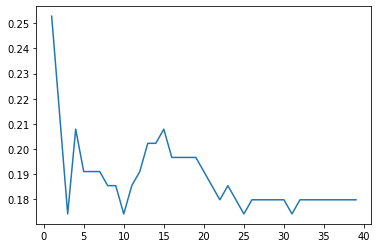

In [32]:
plt.plot(range(1,40), error_list)

print(np.argmin(error_list))
error_list[6]

In [33]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_val)

print(classification_report(y_val, knn_predictions))
print(confusion_matrix(y_val, knn_predictions))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85       115
           1       0.84      0.49      0.62        63

    accuracy                           0.79       178
   macro avg       0.81      0.72      0.74       178
weighted avg       0.80      0.79      0.77       178

[[109   6]
 [ 32  31]]


## Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

dt_predictions = dt.predict(X_val)

print(classification_report(y_val, dt_predictions))
print(confusion_matrix(y_val, dt_predictions))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       115
           1       0.69      0.63      0.66        63

    accuracy                           0.77       178
   macro avg       0.75      0.74      0.74       178
weighted avg       0.77      0.77      0.77       178

[[97 18]
 [23 40]]


## Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)

rf.fit(X_train, y_train)

rf_predictions = rf.predict(X_val)

print(classification_report(y_val, rf_predictions))
print(confusion_matrix(y_val, rf_predictions))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       115
           1       0.82      0.75      0.78        63

    accuracy                           0.85       178
   macro avg       0.85      0.83      0.84       178
weighted avg       0.85      0.85      0.85       178

[[105  10]
 [ 16  47]]


In [36]:
rf_predictions

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0], dtype=int64)

# Working on Test Data

In [119]:
test_data.head()

X_test = test_data

In [120]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


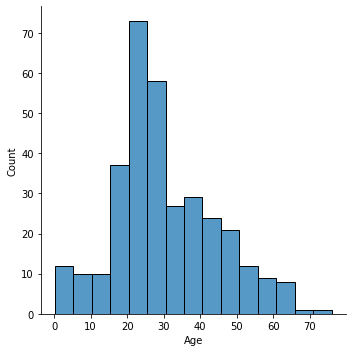

In [121]:
sns.displot(X_test["Age"])

In [122]:
X_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

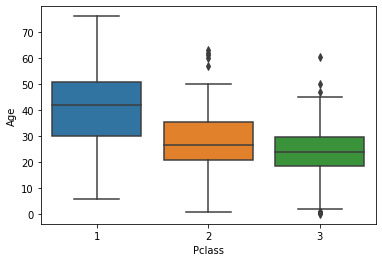

In [123]:
sns.boxplot(x="Pclass", y="Age", data=X_test)

In [124]:
print(X_test[X_test["Pclass"] == 1]["Age"].mean())
print(X_test[X_test["Pclass"] == 2]["Age"].mean())
print(X_test[X_test["Pclass"] == 3]["Age"].mean())

40.91836734693877
28.7775
24.02794520547945


In [125]:
def fill_in_na_values_test(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return round(X_test[X_test["Pclass"] == 1]["Age"].mean())
        elif pclass == 2:
            return round(X_test[X_test["Pclass"] == 2]["Age"].mean())
        elif pclass == 3:
            return round(X_test[X_test["Pclass"] == 3]["Age"].mean())
    else:
        return age
    
X_test["Age"] = X_test[["Age", "Pclass"]].apply(fill_in_na_values, axis=1)
X_test.isnull().sum()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [126]:
X_test.drop(["Cabin"], axis=1, inplace=True)

In [127]:
X_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [128]:
X_test["Fare"] = X_test["Fare"].fillna(0)

In [129]:
X_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [130]:
X_test.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace=True)

In [131]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [132]:
sex_test = pd.get_dummies(X_test["Sex"], drop_first=True)
embarked_test = pd.get_dummies(X_test["Embarked"], drop_first=True)

In [133]:
X_test = pd.concat([X_test, sex_test, embarked_test], axis=1)
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,3,male,34.5,0,0,7.8292,Q,1,1,0
1,3,female,47.0,1,0,7.0000,S,0,0,1
2,2,male,62.0,0,0,9.6875,Q,1,1,0
3,3,male,27.0,0,0,8.6625,S,1,0,1
4,3,female,22.0,1,1,12.2875,S,0,0,1


In [134]:
X_test.drop(["Sex", "Embarked"], axis=1, inplace=True)

In [135]:
X_test

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...
413,3,25.0,0,0,8.0500,1,0,1
414,1,39.0,0,0,108.9000,0,0,0
415,3,38.5,0,0,7.2500,1,0,1
416,3,25.0,0,0,8.0500,1,0,1


In [136]:
X_test_arr = scaler.transform(X_test)
X_test_arr

array([[1.        , 0.4282483 , 0.        , ..., 1.        , 1.        ,
        0.        ],
       [1.        , 0.58532295, 0.125     , ..., 0.        , 0.        ,
        1.        ],
       [0.5       , 0.77381252, 0.        , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [1.        , 0.47851219, 0.        , ..., 1.        , 0.        ,
        1.        ],
       [1.        , 0.30887158, 0.        , ..., 1.        , 0.        ,
        1.        ],
       [1.        , 0.30887158, 0.125     , ..., 1.        , 0.        ,
        0.        ]])

In [137]:
final_test_predictions = rf.predict(X_test_arr)
final_test_predictions

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [138]:
submission = test[["PassengerId"]]
submission

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [139]:
submission["Survived"] = final_test_predictions
submission

C:\Users\admin\AppData\Local\Temp\ipykernel_10160\3401171509.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission["Survived"] = final_test_predictions


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [140]:
submission.to_csv("final_submission.csv", index=False)